# 1. IMPORT LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import random

# 2. LOAD AND PREPROCESS DATA

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# ANN: Flatten the data
X_train_ann = X_train.reshape(-1, 784).astype('float32') / 255.0
X_test_ann = X_test.reshape(-1, 784).astype('float32') / 255.0

# CNN: Keep the 2D shape with 1 channel
X_train_cnn = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test_cnn = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 3. BUILD AND TRAIN ANN MODEL

In [3]:
print("\n Training ANN model...\n")
ann_model = Sequential()
ann_model.add(Dense(128, input_shape=(784,), activation='relu'))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(10, activation='softmax'))

ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann_history = ann_model.fit(X_train_ann, y_train_cat, epochs=10, batch_size=64, validation_split=0.2)


🔧 Training ANN model...



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8420 - loss: 0.5621 - val_accuracy: 0.9551 - val_loss: 0.1553
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9581 - loss: 0.1424 - val_accuracy: 0.9613 - val_loss: 0.1298
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9744 - loss: 0.0872 - val_accuracy: 0.9692 - val_loss: 0.1033
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9818 - loss: 0.0627 - val_accuracy: 0.9717 - val_loss: 0.0998
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9853 - loss: 0.0468 - val_accuracy: 0.9710 - val_loss: 0.1003
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9873 - loss: 0.0399 - val_accuracy: 0.9750 - val_loss: 0.0900
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9910 - loss: 0.0290 - val_accuracy: 0.9768 - val_loss: 0.0854
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9927 - loss: 0.0231 - val_accuracy: 

# 4. EVALUATE ANN


 Evaluating ANN...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9701 - loss: 0.1083
 ANN Test Accuracy: 0.9757
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


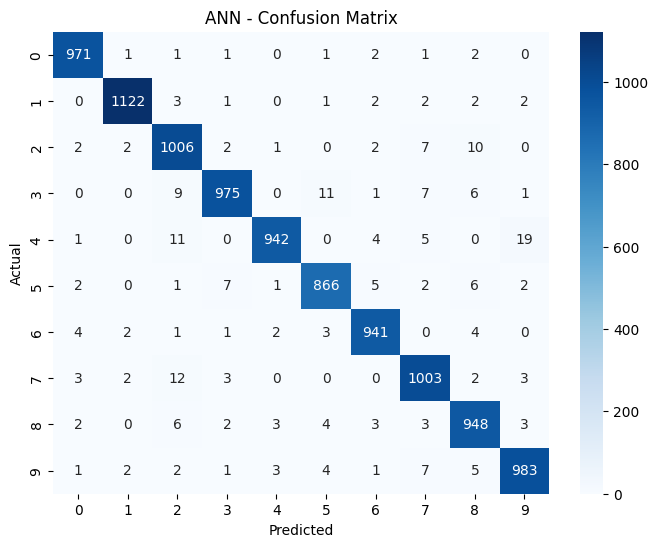


ANN - Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.99      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



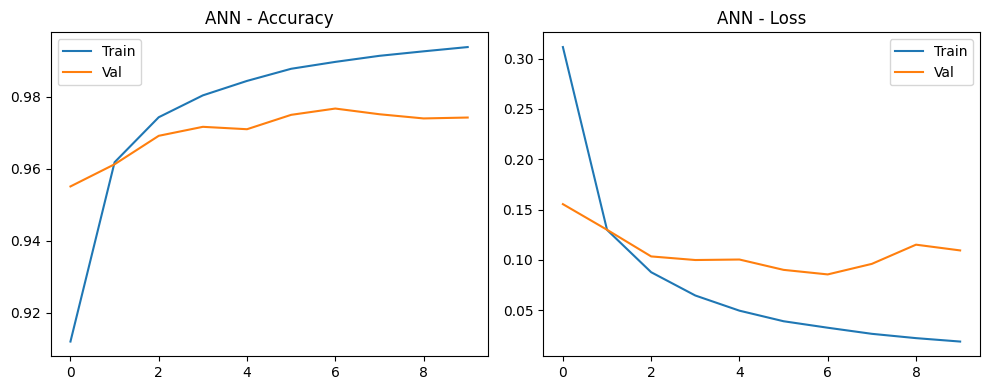

In [4]:
print("\n Evaluating ANN...")
ann_test_loss, ann_test_acc = ann_model.evaluate(X_test_ann, y_test_cat)
print(f" ANN Test Accuracy: {ann_test_acc:.4f}")

# Confusion Matrix for ANN
y_pred_ann = ann_model.predict(X_test_ann)
y_pred_ann_classes = np.argmax(y_pred_ann, axis=1)

cm_ann = confusion_matrix(y_test, y_pred_ann_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues')
plt.title("ANN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nANN - Classification Report:\n")
print(classification_report(y_test, y_pred_ann_classes))

# Accuracy and Loss Plots for ANN
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(ann_history.history['accuracy'], label='Train')
plt.plot(ann_history.history['val_accuracy'], label='Val')
plt.title("ANN - Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(ann_history.history['loss'], label='Train')
plt.plot(ann_history.history['val_loss'], label='Val')
plt.title("ANN - Loss")
plt.legend()
plt.tight_layout()
plt.show()

# 5. BUILD AND TRAIN CNN MODEL

In [5]:
print("\n Training CNN model...\n")
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(X_train_cnn, y_train_cat, epochs=10, batch_size=64, validation_split=0.2)


 Training CNN model...



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.8446 - loss: 0.4919 - val_accuracy: 0.9787 - val_loss: 0.0671
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 55ms/step - accuracy: 0.9783 - loss: 0.0733 - val_accuracy: 0.9872 - val_loss: 0.0454
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 58ms/step - accuracy: 0.9850 - loss: 0.0495 - val_accuracy: 0.9884 - val_loss: 0.0390
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - accuracy: 0.9878 - loss: 0.0398 - val_accuracy: 0.9895 - val_loss: 0.0377
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 62ms/step - accuracy: 0.9902 - loss: 0.0315 - val_accuracy: 0.9893 - val_loss: 0.0368
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - accuracy: 0.9916 - loss: 0.0248 - val_accuracy: 0.9913 - val_loss: 0.0332
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 59ms/step - accuracy: 0.9935 - loss: 0.0206 - val_accuracy: 0.9902 - val_loss: 0.0355
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 57ms/step - accuracy: 0.9948 - loss: 0.0158 - 

# 6. EVALUATE CNN


 Evaluating CNN...
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9904 - loss: 0.0307
 CNN Test Accuracy: 0.9927
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


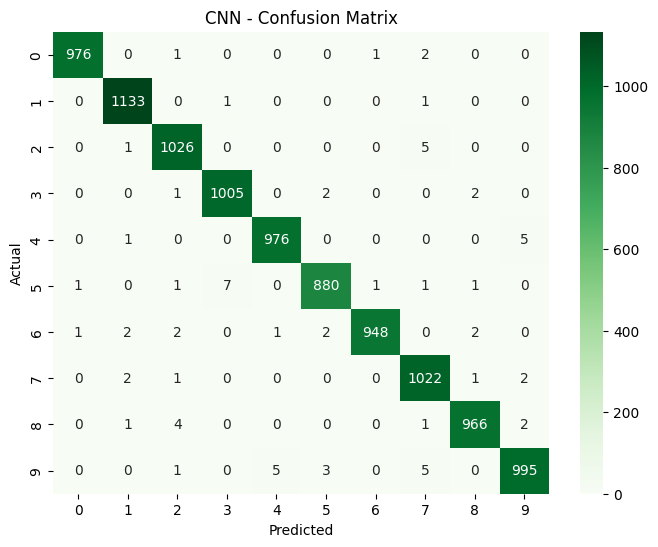


CNN - Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



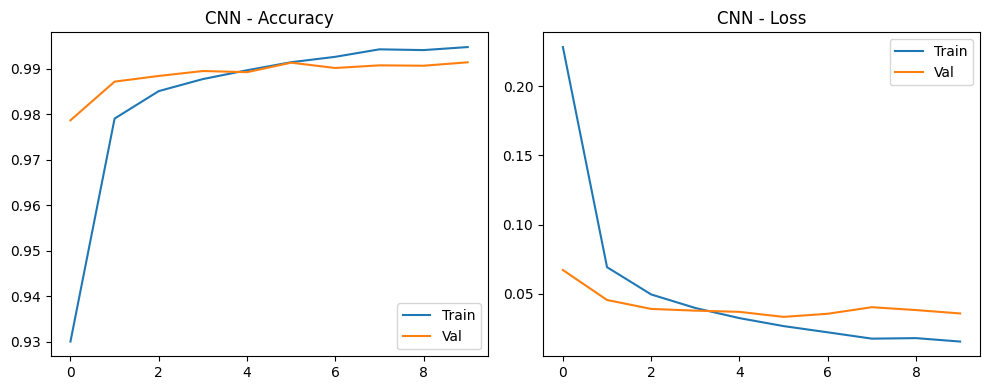

In [6]:
print("\n Evaluating CNN...")
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test_cnn, y_test_cat)
print(f" CNN Test Accuracy: {cnn_test_acc:.4f}")

# Confusion Matrix for CNN
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

cm_cnn = confusion_matrix(y_test, y_pred_cnn_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Greens')
plt.title("CNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nCNN - Classification Report:\n")
print(classification_report(y_test, y_pred_cnn_classes))

# Accuracy and Loss Plots for CNN
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(cnn_history.history['accuracy'], label='Train')
plt.plot(cnn_history.history['val_accuracy'], label='Val')
plt.title("CNN - Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(cnn_history.history['loss'], label='Train')
plt.plot(cnn_history.history['val_loss'], label='Val')
plt.title("CNN - Loss")
plt.legend()
plt.tight_layout()
plt.show()

# 7. VISUALIZE RANDOM PREDICTIONS FROM BOTH MODELS

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


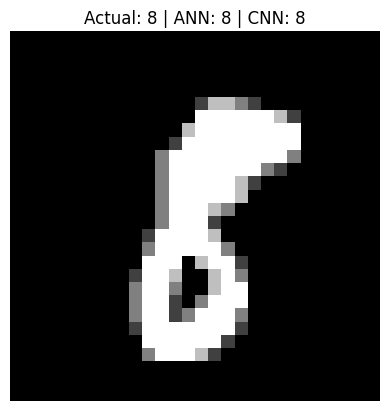

In [11]:
rand_idx = random.randint(0, len(X_test)-1)

# ANN prediction
ann_prediction = np.argmax(ann_model.predict(X_test_ann[rand_idx].reshape(1,784)))
# CNN prediction
cnn_prediction = np.argmax(cnn_model.predict(X_test_cnn[rand_idx].reshape(1,28,28,1)))

plt.imshow(X_test[rand_idx], cmap='gray')
plt.title(f"Actual: {y_test[rand_idx]} | ANN: {ann_prediction} | CNN: {cnn_prediction}")
plt.axis('off')
plt.show()
